In [469]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [470]:
import os
import matplotlib
import matplotlib.pyplot as plt
import glob
import math
import numpy as np
import pandas as pd
from bisect import *
from decimal import Decimal

In [471]:
dir = '/Users/innocent/cernbox/HepSpec/fragData/'
Blabel ='Before reboot THP on'
Alabel ='After reboot THP on'
Clabel ='After reboot THP off'
#file = dir+'perfMonAMD1.log'
#amd = True
#file = dir+'perfMonORI.log'
#fileB = dir+'perfMonORI.log'
#fileA = dir+'perfMonFIXED.log'
file = dir+'perfMon_benchAllA.log'
fileC = fileB = fileA = file
#fileC = dir+'perfMon_benchNoTHP.log'
#fileB = dir+'perfMon_benchB.log'
#fileA = dir+'perfMon_benchA.log'
#file = dir+'perfMonJE3.log'
#file = dir+'perfMonMultiA2.log'
#file = dir+'perfMonNoTHP2.log'
amd = False

In [472]:
columns = ['time','rawValue','unit','name','count','frac','metricValue','metric']
perfRawA =  pd.read_csv(fileA, delimiter=",",names=columns)
perfRawA['metric'] = perfRawA['metric'] +'_' + perfRawA['name']
perfRawB =  pd.read_csv(fileB, delimiter=",",names=columns)
perfRawB['metric'] = perfRawB['metric'] +'_' + perfRawB['name']
perfRawC =  pd.read_csv(fileC, delimiter=",",names=columns)
perfRawC['metric'] = perfRawC['metric'] +'_' + perfRawC['name']

In [473]:
clus=perfRawA
print(clus.index)
print(clus.columns)
print(clus.size)
print(clus.describe())
print(clus.head(25))
print(clus.tail())

RangeIndex(start=0, stop=17556, step=1)
Index(['time', 'rawValue', 'unit', 'name', 'count', 'frac', 'metricValue',
       'metric'],
      dtype='object')
140448
               time      rawValue         count          frac   metricValue
count  17556.000000  1.755600e+04  1.755600e+04  17556.000000  17556.000000
mean    4628.726027  2.457455e+11  3.848725e+11     60.087395    180.404120
std     2669.557288  4.691232e+11  1.963740e+11     30.659259    326.418636
min       10.012103  0.000000e+00  2.133708e+11     33.330000      0.000000
25%     2319.383731  3.304535e+05  2.135103e+11     33.330000      0.042000
50%     4628.702384  1.732768e+09  2.668783e+11     41.670000      1.850000
75%     6937.664397  2.648118e+11  6.404868e+11    100.000000    246.861250
max     9248.213291  3.021110e+12  6.407038e+11    100.000000   2452.227000
         time      rawValue  unit                                        name  \
0   10.012103  6.405724e+05  msec                                  task-c

In [474]:
rawA = perfRawA.pivot(index='time', columns='name', values='rawValue')
rawB = perfRawB.pivot(index='time', columns='name', values='rawValue')
rawC = perfRawC.pivot(index='time', columns='name', values='rawValue')
#raw = raw[raw['cycles']>250000000000.]

In [475]:
metricsA = perfRawA.pivot(index='time', columns='metric', values='metricValue')
metricsB = perfRawB.pivot(index='time', columns='metric', values='metricValue')
metricsC = perfRawC.pivot(index='time', columns='metric', values='metricValue')
#metrics = metrics[metrics['GHz_cycles']>0.59]
# xmax = 1600 #1850
#xmax = 1750
xmax = 9300

In [476]:
def cycle(raw) : 
  fig, ax1 = plt.subplots(1, sharex=True,figsize=(10, 4))
  raw['cycles'].plot(ax=ax1)
  if amd :
     raw['stalled-cycles-backend'].plot(ax=ax1)
     raw['stalled-cycles-frontend'].plot(ax=ax1)
  else :
     raw['cycle_activity.stalls_total'].plot(ax=ax1)
     raw['cycle_activity.stalls_mem_any'].plot(ax=ax1)
  ax1.legend()
  ax1.grid()
  ax1.set_xlim(0.,xmax)
  plt.show()

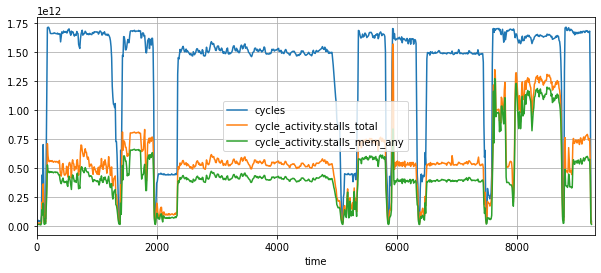

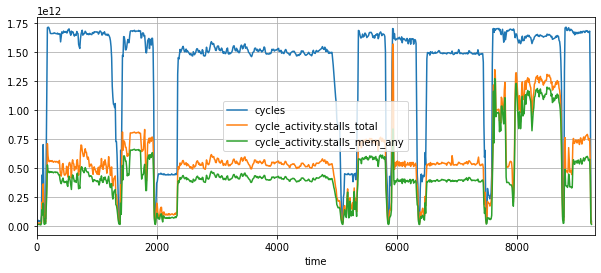

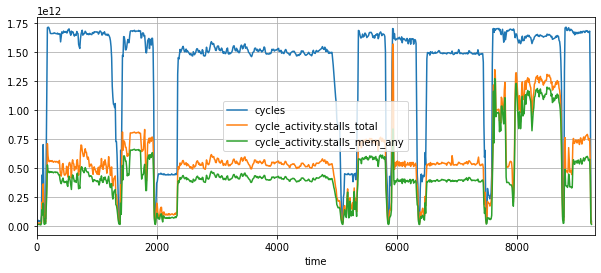

In [477]:
cycle(rawB)
cycle(rawA)
cycle(rawC)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


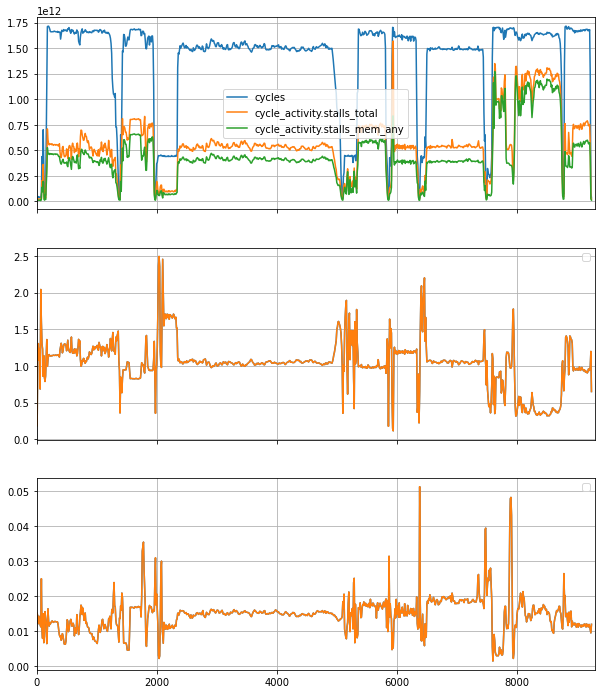

In [478]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True,figsize=(10, 12))
rawA['cycles'].plot(ax=ax1)
if amd :
 rawB['stalled-cycles-backend'].plot(ax=ax1)
 rawB['stalled-cycles-frontend'].plot(ax=ax1)
else :
 rawB['cycle_activity.stalls_total'].plot(ax=ax1)
 rawB['cycle_activity.stalls_mem_any'].plot(ax=ax1)
ax1.legend()
ax1.grid()
ax1.set_xlim(0.,xmax)
ax2.plot(rawA['instructions']/rawA['cycles'])
ax2.plot(rawB['instructions']/rawB['cycles'])
#metrics['insn per cycle_instructions'].plot(ax=ax2)
ax2.legend()
ax2.grid()
#metrics['GHz_cycles'].plot(ax=ax3)
ax3.plot(rawA['branch-misses']/rawA['branch-instructions'])
ax3.plot(rawB['branch-misses']/rawB['branch-instructions'])
ax3.legend()
ax3.grid()
plt.show()

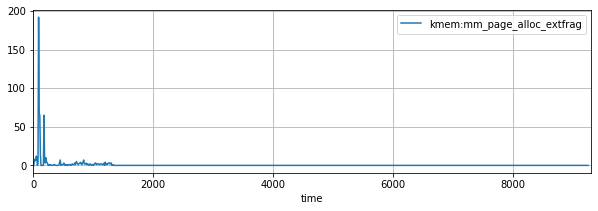

In [479]:
fig, axs = plt.subplots(figsize=(10, 3))
rawA['kmem:mm_page_alloc_extfrag'].plot()
axs.legend()
axs.set_xlim(0.,xmax)
plt.grid()
plt.show()

In [480]:
def kmem(raw) :
  fig, axs = plt.subplots(figsize=(10, 3))
  #raw['kmem:mm_page_alloc_extfrag'].plot()
  raw['kmem:mm_page_alloc'].plot()
  raw['kmem:mm_page_free'].plot()
  #raw['kmem:kmem_cache_alloc'].plot()
  #raw['kmem:kmem_cache_free'].plot()
  axs.legend()
  axs.set_xlim(0.,xmax)
  plt.grid()
  plt.show()


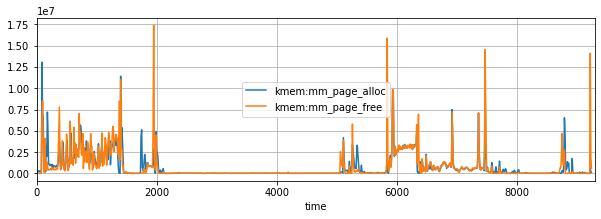

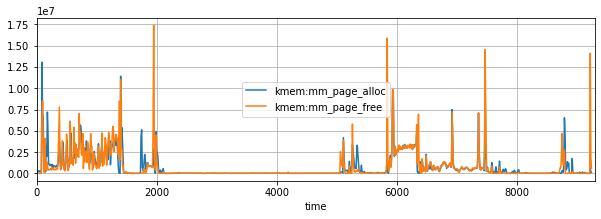

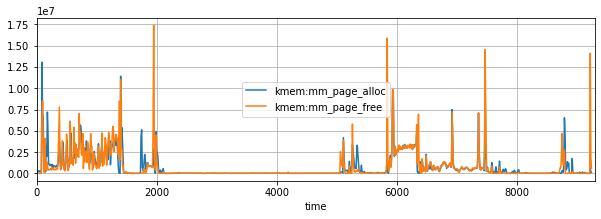

In [481]:
kmem(rawB)
kmem(rawA)
kmem(rawC)

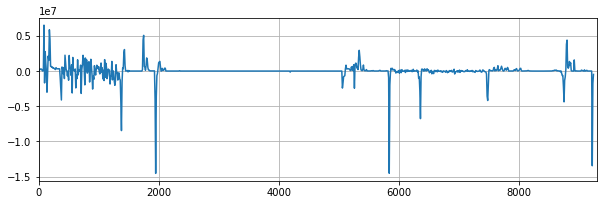

In [482]:
raw = rawA
fig, axs = plt.subplots(figsize=(10, 3))
axs.plot(raw['kmem:mm_page_alloc']-raw['kmem:mm_page_free'])
axs.set_xlim(0.,xmax)
#axs.legend()
plt.grid()
plt.show()

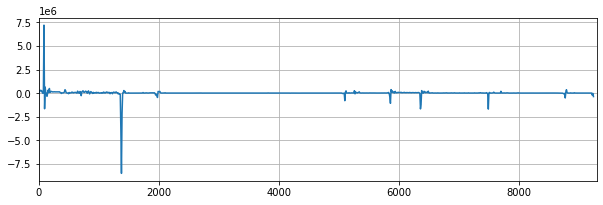

In [483]:
fig, axs = plt.subplots(figsize=(10, 3))
axs.plot(raw['kmem:kmem_cache_alloc']-raw['kmem:kmem_cache_free'])
axs.set_xlim(0.,xmax)
#axs.legend()
plt.grid()
plt.show()

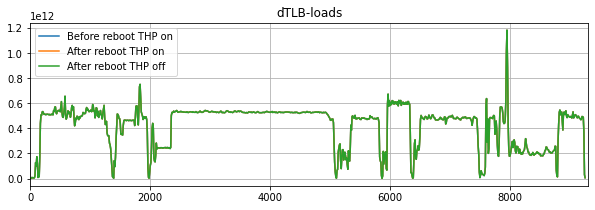

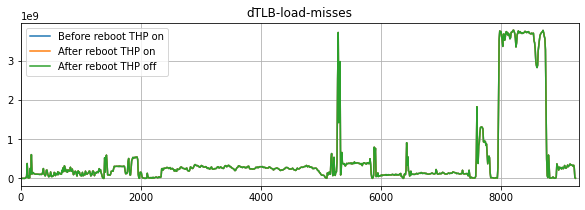

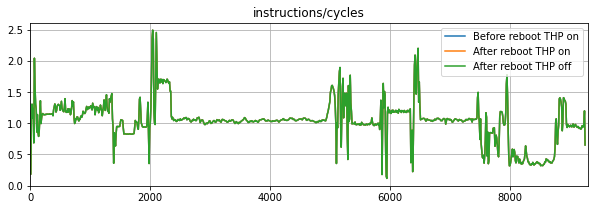

In [484]:
fig, ax1 = plt.subplots(1, sharex=True,figsize=(10, 3))
ax1.plot(rawB['dTLB-loads'] ,label=Blabel)
ax1.plot(rawA['dTLB-loads'] ,label=Alabel)
ax1.plot(rawC['dTLB-loads'] ,label=Clabel)
ax1.set_xlim(0.,xmax)
plt.title('dTLB-loads')
ax1.legend()
ax1.grid()
plt.show()
fig, ax1 = plt.subplots(1, sharex=True,figsize=(10, 3))
ax1.plot(rawB['dTLB-load-misses'] ,label=Blabel)
ax1.plot(rawA['dTLB-load-misses'] ,label=Alabel)
ax1.plot(rawC['dTLB-load-misses'] ,label=Clabel)
ax1.set_xlim(0.,xmax)
plt.title('dTLB-load-misses')
ax1.legend()
ax1.grid()
plt.show()
fig, ax1 = plt.subplots(1, sharex=True,figsize=(10, 3))
ax1.plot(rawB['instructions']/rawB['cycles'],label=Blabel)
ax1.plot(rawA['instructions']/rawA['cycles'],label=Alabel)
ax1.plot(rawC['instructions']/rawC['cycles'],label=Clabel)
ax1.set_xlim(0.,xmax)
plt.title('instructions/cycles')
ax1.legend()
ax1.grid()
plt.show()


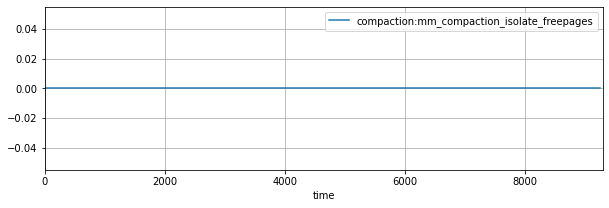

In [485]:
raw=rawA
if amd: 
    fig, axs = plt.subplots(figsize=(10, 3))
    raw['compaction:mm_compaction_try_to_compact_pages'].plot()
    raw['huge_memory:mm_collapse_huge_page'].plot()
    axs.set_xlim(0.,xmax)
    axs.legend()
    #plt.yscale("log")
    plt.grid()
    plt.show()
fig, axs = plt.subplots(figsize=(10, 3))
raw['compaction:mm_compaction_isolate_freepages'].plot()
axs.set_xlim(0.,xmax)
axs.legend()
#plt.yscale("log")
plt.grid()
plt.show()
